In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import json

Matplotlib created a temporary cache directory at /tmp/matplotlib-arn5yi9w because the default path (/mnt/nvme/home/durech/camille/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Chunking strategies

In [2]:
import pandas as pd

# result of different chunking strategies for the Wikitext dataset
data = {
    "Chunking method": ["Sentence splitting", "Sentence splitting", "Sentence splitting", "Recursive splitting", "Recursive splitting", "Recursive splitting", "Semantic", "Semantic + max chunk size", "Semantic + min length", "Semantic pairs + min length", "Semantic pairs + min length + para", "Semantic pairs + min length", "Semantic pairs + min length", "Chain", "Chain", "LDA"],
    "max chunk size": [512, 1024, 1024, 512, 1024, 1024, "None", 2048, "None", "None", "None", "None", "None", "None", "None", "None"],
    "Pourcent thresh": ["None", "None", "None", "None", "None", "None", 90, 90, 90, 80, 95, 90, 95, "None", "None", "None"],
    "buffer size": ["None", "None", "None", "None", "None", "None", 2, 2, 2,2, 2, 2, 2, 2, 1, "None"],
    "overlap": [20, 20, 0, 20, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "model": ["bge - None"] * 16,
    "Hit Rate": [0.918, 0.908, 0.908, 0.924, 0.928, 0.896, 0.77, 0.784, 0.839 , 0.862, 0.938, 0.9, 0.896, 0.924, 0.916, 0.92],
    "MRR": [0.814, 0.782, 0.783, 0.88, 0.853, 0.857, 0.707, 0.724, 0.780 , 0.805,  0.846, 0.814, 0.822, 0.89, 0.846, 0.826],
    "nodes number":  [11717,6057, 11640, 69025, 33319, 68130, 27611, 26053, 21008, 35059, 18184, 15937, 11141, 16095, 39138, 14525]
}

df = pd.DataFrame(data)
df


,Chunking method,max chunk size,Pourcent thresh,buffer size,overlap,model,Hit Rate,MRR,nodes number
0,Sentence splitting,512,None,None,20,bge - None,0.918,0.814,11717
1,Sentence splitting,1024,None,None,20,bge - None,0.908,0.782,6057
2,Sentence splitting,1024,None,None,0,bge - None,0.908,0.783,11640
3,Recursive splitting,512,None,None,20,bge - None,0.924,0.880,69025
4,Recursive splitting,1024,None,None,20,bge - None,0.928,0.853,33319
5,Recursive splitting,1024,None,None,0,bge - None,0.896,0.857,68130
6,Semantic,None,90,2,0,bge - None,0.770,0.707,27611
7,Semantic + max chunk size,2048,90,2,0,bge - None,0.784,0.724,26053
8,Semantic + min length,None,90,2,0,bge - None,0.839,0.780,21008
9,Semantic pairs + min length,None,80,2,0,bge - None,0.862,0.805,35059


/tmp/ipykernel_77600/2354306214.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.scatterplot(


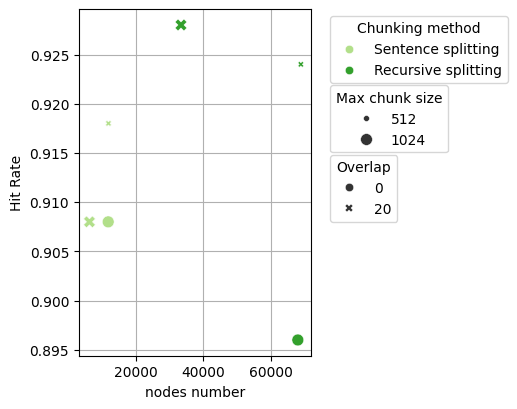

In [3]:
# chunking result

import matplotlib.pyplot as plt

# colors
palette = [(0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (0.0, 0.3, 0.7) 
 ]

fig, ax = plt.subplots(figsize=(3, 4.5))
ax = sns.scatterplot(
    data=df.iloc[:6],
    x='nodes number',
    y='Hit Rate',
    hue='Chunking method',
    size='max chunk size',
    style='overlap',
    palette=palette
)
# Split the legend into separate groups for more control
# Get existing handles and labels
handles, labels = ax.get_legend_handles_labels()

# order just for the right colors
# Create legend entries for each part manually
hue_handles = handles[1:3]   # Chunking method
hue_labels = labels[1:3]

size_handles = handles[4:6]  # Max chunk size
size_labels = labels[4:6]

style_handles = handles[7:9] # Overlap
style_labels = labels[7:9]


legend2 = ax.legend(size_handles, size_labels, bbox_to_anchor=(1.05, 0.8), loc='upper left', title='Max chunk size')
ax.add_artist(legend2)  
legend3 = ax.legend(style_handles, style_labels, bbox_to_anchor=(1.05, 0.6), loc='upper left', title='Overlap')
ax.add_artist(legend3)
legend1 = ax.legend(hue_handles, hue_labels, bbox_to_anchor=(1.05, 1), loc='upper left', title='Chunking method')
plt.grid()
plt.savefig('wikitext_sent_recu.png', bbox_inches='tight', dpi=600)
plt.show()

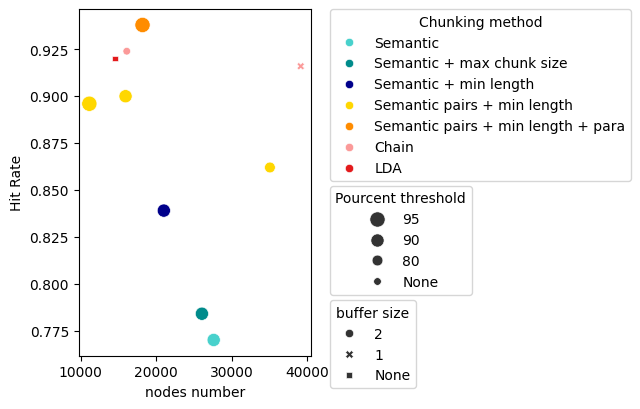

In [4]:
palette = [
    (72/255,209/255,204/255),
    (0/255,139/255,139/255),
    (0,0,139/255),
    (255/255,215/255,0),
    (255/255,140/255,0),
    
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 ]
size_mapping = {95:120,90:90,80:60,"None":30} 

fig, ax = plt.subplots(figsize=(3, 4.5))
ax = sns.scatterplot(
    data=df.iloc[6:],
    x='nodes number',
    y='Hit Rate',
    hue='Chunking method',
    size="Pourcent thresh",
    sizes=size_mapping,
    style="buffer size",
    palette=palette
)

handles, labels = ax.get_legend_handles_labels()

# Create legend entries for each part manually
hue_handles = handles[1:8]
hue_labels = labels[1:8]

size_handles = [handles[i] for i in [11,9,10,12]]
size_labels = [labels[i] for i in [11,9,10,12]]

style_handles = handles[14:]
style_labels = labels[14:]


legend2 = ax.legend(size_handles, size_labels, bbox_to_anchor=(1.05, 0.51), loc='upper left', title='Pourcent threshold')
ax.add_artist(legend2)  
legend3 = ax.legend(style_handles, style_labels, bbox_to_anchor=(1.05, 0.18), loc='upper left', title='buffer size')
ax.add_artist(legend3)
legend1 = ax.legend(hue_handles, hue_labels, bbox_to_anchor=(1.05, 1.02), loc='upper left', title='Chunking method')

plt.savefig('wikitext_semantic.png', bbox_inches='tight', dpi=600)

plt.show()

In [5]:
# result for the chunking strategies of ICRC dataset

palette = {"Recursive": (0.5, 0.0, 0.5),
 "Semantic pairs": (255/255, 127/255, 80/255), 
 "Chain":  (0.8901960784313725, 0.10196078431372549, 0.10980392156862745), 
 "LDA": (0.984313725490196, 0.6039215686274509, 0.6),}

variables = ["\n bge - None", "bge - bge", "BM25-None", "BM25-bge"]

import numpy as np

# Define the data as a nested list
data_hit_rate = np.array([
  [0.484, 0.484, 0.574, 0.622],
  [0.54, 0.612, 0.648, 0.66],
  [0.532, 0.61, 0.616, 0.642],
  [0.5, 0.578, 0.612, 0.64]
]
)

data_mrr = np.array(
    [
  [0.395, 0.439, 0.506, 0.559],
  [0.452, 0.547, 0.574, 0.586],
  [0.444, 0.545, 0.54, 0.579],
  [0.433, 0.531, 0.523, 0.583]
]
)

models_names = ["Recursive", "Semantic pairs", "Chain", "LDA"]

Recursive
Semantic pairs
Chain
LDA


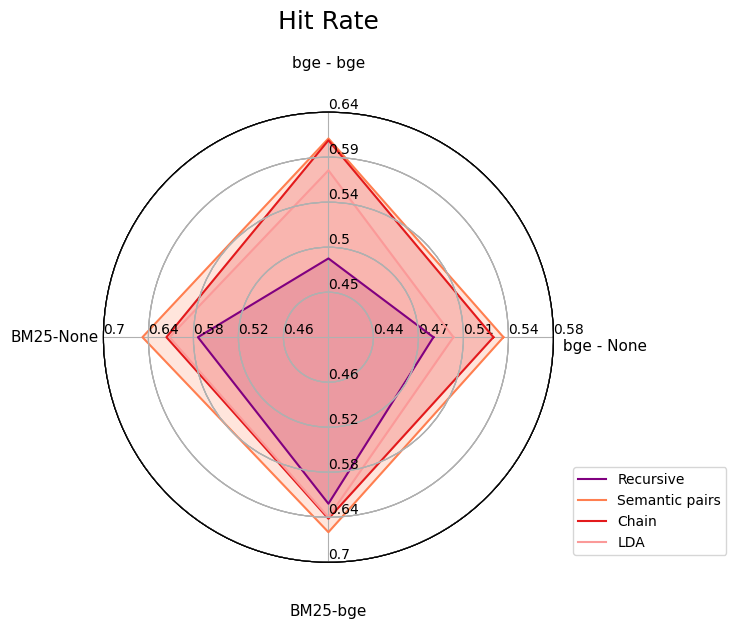

Recursive
Semantic pairs
Chain
LDA


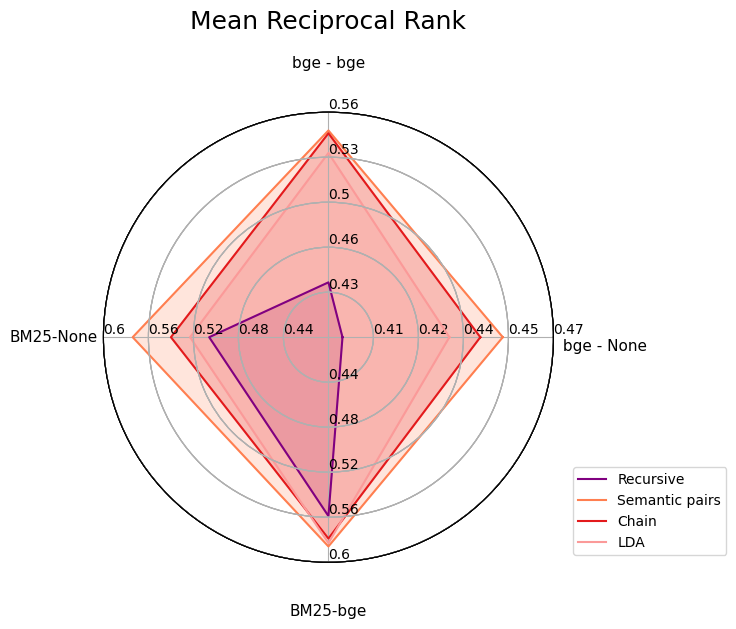

In [6]:
def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    """
    Build a radar plot
    """
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables, fontsize=11)
        axes[0].tick_params(pad=25)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
        
    def plot(self, data, bbox_legend, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
        self.ax.legend(loc='lower right', bbox_to_anchor=bbox_legend, fontsize = 10)
        
    def fill(self, data, alpha, color):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], alpha = alpha, color = color)


# example data
ranges = [(0.4,0.58), (0.4,0.64), (0.4,0.7),  (0.4,0.7)]
# plotting
fig1 = plt.figure(figsize=(5, 5))
radar = ComplexRadar(fig1, variables, ranges)

for i, model_name in enumerate(models_names):
    print(model_name)
    radar.plot(list(data_hit_rate[i]), (1.4, 0), label=model_name, color = palette[model_name])
    radar.fill(list(data_hit_rate[i]), alpha=0.2, color = palette[model_name])
plt.title("Hit Rate", pad=60, fontsize=18)
plt.savefig("spider_plot_icrc_hit_rate.png", dpi = 600,  bbox_inches="tight")
plt.show()

ranges = [(0.39,0.47), (0.4,0.56), (0.4,0.6),  (0.4,0.6)]
fig1 = plt.figure(figsize=(5, 5))
radar = ComplexRadar(fig1, variables, ranges)
for i, model_name in enumerate(models_names):
    print(model_name)
    radar.plot(list(data_mrr[i]), (1.4, 0), label=model_name, color = palette[model_name])
    radar.fill(list(data_mrr[i]), alpha=0.2, color = palette[model_name])
plt.title("Mean Reciprocal Rank", pad = 60, fontsize=18)
plt.savefig("spider_plot_icrc_mrr.png", dpi = 600,  bbox_inches="tight")
plt.show()


In [7]:
import sys
from PIL import Image

# fuse images
images = [Image.open(x) for x in ['spider_plot_icrc_hit_rate.png', 'spider_plot_icrc_mrr.png']]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

new_im.save('final_spider_plot.jpg', dpi = (600,600))

### Compare embedding models

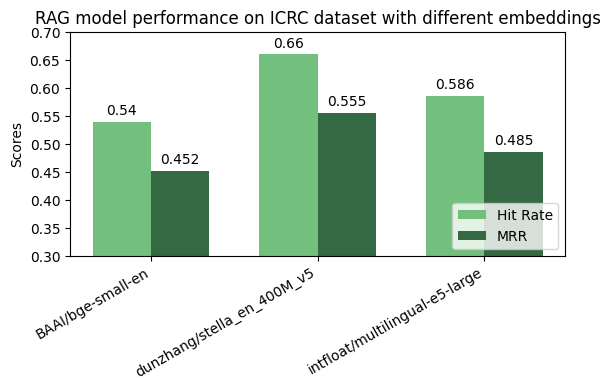

In [8]:
# Embedding model

labels = ['BAAI/bge-small-en', 'dunzhang/stella_en_400M_v5', 'intfloat/multilingual-e5-large',]
hr_means = [0.540, 0.660, 0.586]
mrr_means = [0.452, 0.555, 0.485]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(6,3))
pal = sns.color_palette("Greens_d", 3)
rects1 = ax.bar(x - width/2, hr_means, width, label='Hit Rate', color= pal[0] )
#  "Semantic pairs": 
rects2 = ax.bar(x + width/2, mrr_means, width, label='MRR', color = pal[-1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('RAG model performance on ICRC dataset with different embeddings')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 'lower right')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
ax.set(ylim=[0.3, 0.7])
plt.xticks(rotation=30, ha='right')
plt.savefig("bar_plot_embedding_ICRC.png", dpi = 600,  bbox_inches="tight")

plt.show()


### Compare Re-ranker models

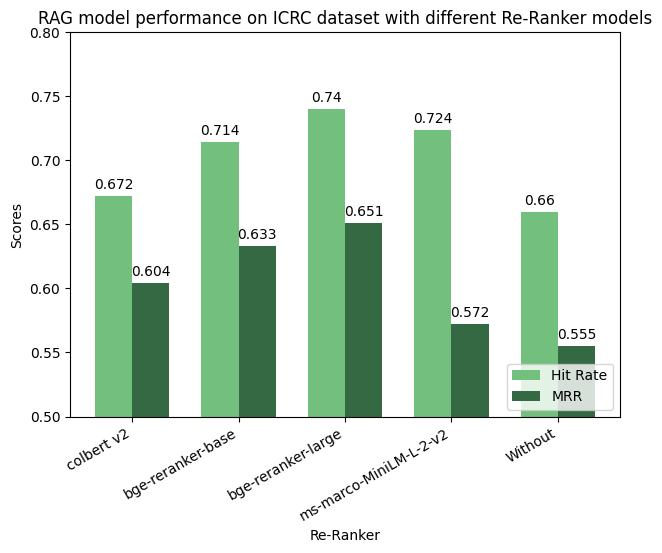

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['colbert v2', "bge-reranker-base", "bge-reranker-large", "ms-marco-MiniLM-L-2-v2", 'Without']
hr_means = [ 0.672, 0.714, 0.740, 0.724,0.660]
mrr_means = [0.604,0.633, 0.651, 0.572,0.555]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
pal = sns.color_palette("Greens_d", 3)
rects1 = ax.bar(x - width/2, hr_means, width, label='Hit Rate', color= pal[0] )
#  "Semantic pairs": 
rects2 = ax.bar(x + width/2, mrr_means, width,label='MRR', color = pal[-1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xlabel("Re-Ranker")
ax.set_title('RAG model performance on ICRC dataset with different Re-Ranker models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 'lower right')
ax.set_ylim(0.5, 0.8)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.xticks(rotation=30, ha='right')
plt.savefig("bar_plot_ICRC_reranker.png", dpi = 600,  bbox_inches="tight")

plt.show()


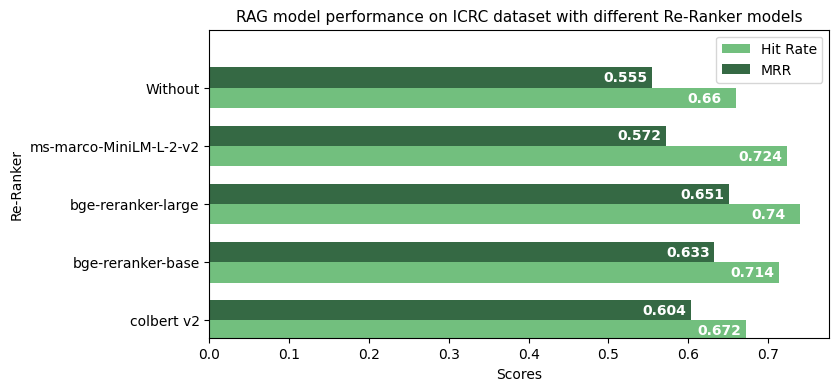

In [10]:
fig, ax = plt.subplots(figsize=(8,4))
pal = sns.color_palette("Greens_d", 3)
rects1 = ax.barh(x - width/2, hr_means, width, align='center', label='Hit Rate', color= pal[0] ) #a horizontal bar chart (use .bar instead of .barh for vertical)
rects2 = ax.barh(x + width/2, mrr_means, width, align='center', label='MRR', color = pal[-1]) #a horizontal bar chart (use .bar instead of .barh for vertical)
ax.set(yticks=x, yticklabels=labels, ylim=[2*width - 1, len(labels)])
ax.bar_label(rects1, padding=-35, color='white', label_type='edge',fontweight='bold')
ax.bar_label(rects2, padding=-35, color='white', label_type='edge',fontweight='bold')


ax.set_xlabel('Scores')
ax.set_ylabel("Re-Ranker")
ax.set_title('RAG model performance on ICRC dataset with different Re-Ranker models', fontsize=11)
plt.savefig("bar_plot_icrc_reranker_hori.png", dpi = 600,  bbox_inches="tight")

plt.legend()
plt.show()

### Compare retrieval models

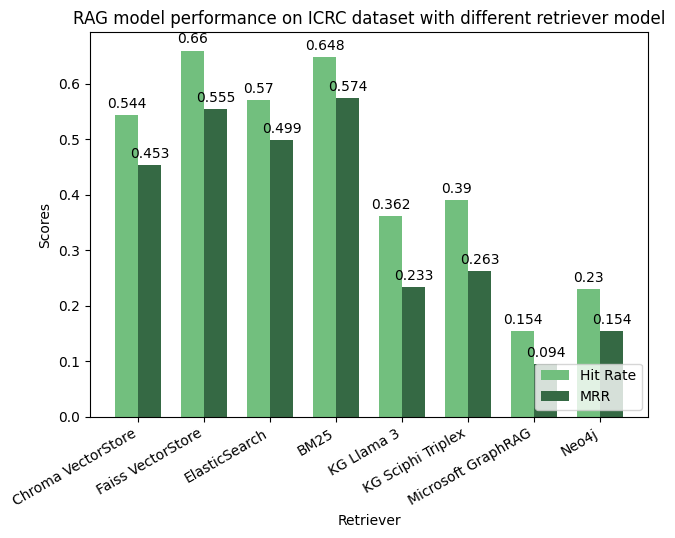

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ["Chroma VectorStore", "Faiss VectorStore", "ElasticSearch", "BM25", 'KG Llama 3', "KG Sciphi Triplex", "Microsoft GraphRAG", "Neo4j"]
hr_means = [0.544, 0.66, 0.57, 0.648, 0.362, 0.39, 0.154, 0.23]
mrr_means = [ 0.453, 0.555, 0.499, 0.574,0.233, 0.263, 0.094, 0.154]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
pal = sns.color_palette("Greens_d", 3)
rects1 = ax.bar(x - width/2, hr_means, width, label='Hit Rate', color= pal[0] )
#  "Semantic pairs": 
rects2 = ax.bar(x + width/2, mrr_means, width, label='MRR', color = pal[-1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xlabel("Retriever")
ax.set_title('RAG model performance on ICRC dataset with different retriever model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 'lower right')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.xticks(rotation=30, ha='right')
plt.savefig("bar_plot_icrc_retriever.png", dpi = 600,  bbox_inches="tight")

plt.show()


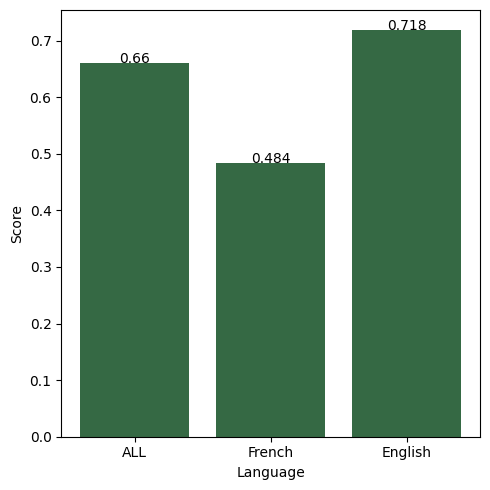

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pal = sns.color_palette("Greens_d", 3)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

x = ['ALL', "French", 'English']
y = [0.660, 0.484, 0.718]

plt.figure(figsize = (5, 5))
    
# making the bar chart on the data
plt.bar(x, y, color = pal[2])
    
# calling the function to add value labels
addlabels(x, y)
    
# giving X and Y labels
plt.xlabel("Language")
plt.ylabel("Score")
    
plt.tight_layout()
plt.savefig("icrc_embed_lang.png", dpi = 600,  bbox_inches="tight")
plt.show()


In [13]:
# Define the columns and the data for each line
columns = ['ALL', 'French', 'English']
data = {
    "VectorStore": [0.660, 0.484, 0.718],
    "BM25": [0.648, 0.266,0.723],
    "KG Triplex": [0.390, 0.168, 0.582]
}

# Create the DataFrame
df = pd.DataFrame(data, index=columns).T


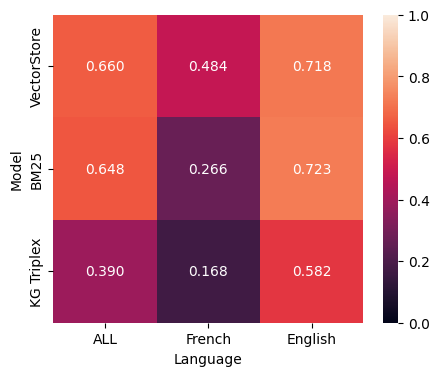

In [14]:
plt.figure(figsize=(5, 4))  
sns.heatmap(df, annot=True,  vmin=0, vmax=1, fmt=".3f")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xlabel("Language")
plt.ylabel("Model")
plt.savefig("heat_map_icrc_lang.png", dpi = 600,  bbox_inches="tight")

In [15]:
palette = {"VectorStore multilingual": sns.color_palette("Paired")[4],
 "VectorStore English": sns.color_palette("Paired")[5], 
 "Triplex KG multilingual":  sns.color_palette("Paired")[0], 
 "Triplex KG English": sns.color_palette("Paired")[1],}

variables = ["\n Hit Rate", "MRR", "Faithfulness", "Relevancy"]

import numpy as np

# Define the data as a nested list
data_lang = np.array([
  [0.66, 0.555, 0.91, 0.79],
  [0.712, 0.611, 0.92, 0.87],
  [0.39, 0.263, 0.76, 0.41],
  [0.576, 0.371, 0.81, 0.5]
]
)

models_names = ["VectorStore multilingual", "VectorStore English", "Triplex KG multilingual", "Triplex KG English"]

VectorStore multilingual
VectorStore English
Triplex KG multilingual
Triplex KG English


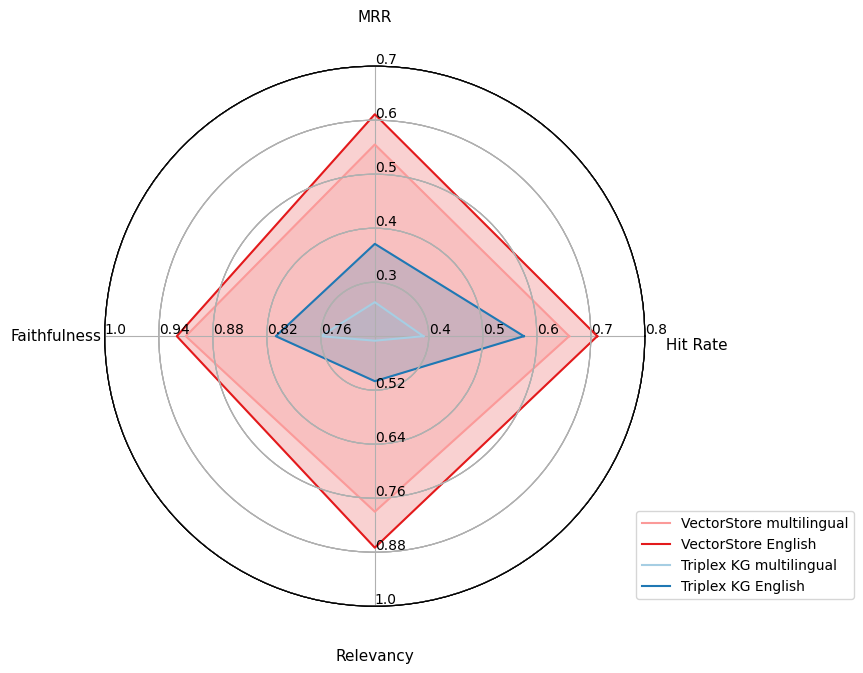

In [16]:
ranges = [(0.3,0.8), (0.2,0.7), (0.7,1),  (0.4,1)]
# plotting
fig1 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig1, variables, ranges)

for i, model_name in enumerate(models_names):
    print(model_name)
    radar.plot(list(data_lang[i]), (1.4, 0), label=model_name, color = palette[model_name])
    radar.fill(list(data_lang[i]), alpha=0.2, color = palette[model_name])
plt.savefig("spider_plot_icrc_lang.png", dpi = 600,  bbox_inches="tight")
# plt.title("Comparative Analysis of Knowledge Graph and VectorStore Performance With and Without English Translation",  y=1.20, pad=-14)
plt.savefig("spider_plot_icrc_KG_VS.png", dpi = 600,  bbox_inches="tight")

plt.show()


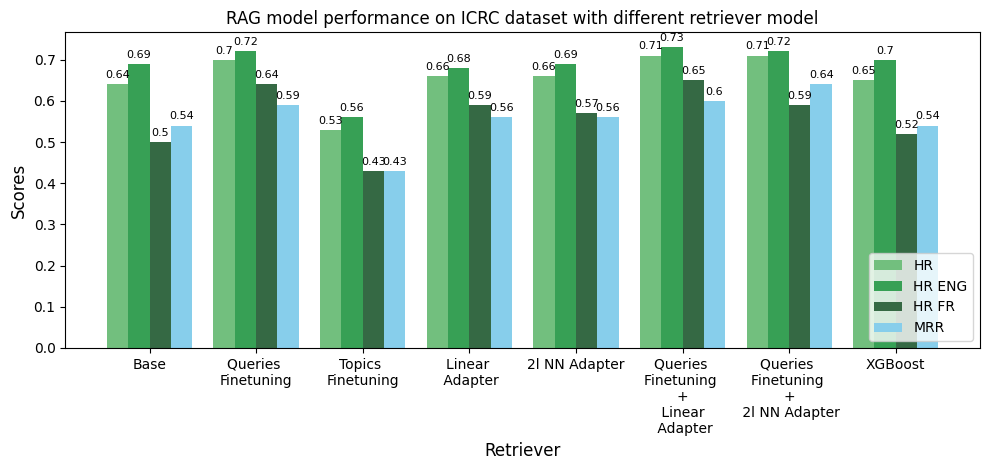

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def draw_brace(ax, xspan, yy, text):
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 300./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.05*y - .01)*yspan # adjust vertical position

    ax.autoscale(False)
    ax.plot(x, -y, color='black', lw=1, clip_on=False)

    ax.text((xmax+xmin)/2., -yy-.17*yspan, text, ha='center', va='bottom')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

labels = ["Base", "Queries \nFinetuning", "Topics \nFinetuning", "Linear \n Adapter", '2l NN Adapter', "Queries \nFinetuning \n+\n Linear \n Adapter", "Queries \nFinetuning \n+\n 2l NN Adapter", "XGBoost"]
hr_means = [0.64,0.7,0.53,0.66,0.66,0.71, 0.71, 0.65]
hrr_fr = [0.50,0.64,0.43,0.59,0.57,0.65, 0.59,  0.52]
hrr_eng = [0.69,0.72,0.56,0.68,0.69, 0.73, 0.72, 0.70]
mrr_means = [0.54,0.59,0.43,0.56,0.56, 0.60 ,0.64, 0.54]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

#set size of the figure
fig, ax = plt.subplots(figsize=(10, 4.8))
pal = sns.color_palette("Greens_d", 3)
rects1 = ax.bar(x - 3*width/2, hr_means, width, label='HR', color= pal[0] )
rects2 = ax.bar(x - width/2, hrr_eng, width, label='HR ENG', color = pal[1])
rects3 = ax.bar(x + width/2, hrr_fr, width, label='HR FR', color = pal[2])
rects4 = ax.bar(x + 3*width/2, mrr_means, width, label='MRR', color = 'skyblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores', fontsize=12)
ax.set_xlabel("Retriever", fontsize=12) #labelpad=60, 
ax.set_title('RAG model performance on ICRC dataset with different retriever model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 'lower right')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# draw_brace(ax, (0.6,2.4),0.21, 'Finetuning')
# draw_brace(ax, (2.6,4.4),0.21, 'Adapter')
# draw_brace(ax, (4.6,6.4),0.21, 'Combined')
# draw_brace(ax, (4,6),2, 'rise')

fig.tight_layout()
# plt.xticks(rotation=0, ha='right')
plt.savefig("bar_plot_embed_improvement.png", dpi = 600,  bbox_inches="tight")

plt.show()


### Final results

In [18]:
df = pd.DataFrame(data=[{"base": 0.484, "Semantic pairs" : 0.54, "Faiss + Stella" : 0.66, "Finetuning + Adapter":0.71, "Re-Ranker":0.742},
                        {"base":0.395, "Semantic pairs" : 0.452, "Faiss + Stella" : 0.555, "Finetuning + Adapter":0.64, "Re-Ranker":0.688}])
df = pd.DataFrame(data=[{"base": 0.484, "Semantic pairs" : 0.056, "Faiss + Stella" : 0.12, "Finetuning + Adapter":0.05, "Re-Ranker":0.032},
                        {"base": 0.395, "Semantic pairs" : 0.057, "Faiss + Stella" : 0.103, "Finetuning + Adapter":0.085, "Re-Ranker":0.048}],
                  index = ["HR", "MRR"])
df

,base,Semantic pairs,Faiss + Stella,Finetuning + Adapter,Re-Ranker
HR,0.484,0.056,0.120,0.050,0.032
MRR,0.395,0.057,0.103,0.085,0.048


In [19]:
prop = [[(65.2,0.427), (7.6, 0.512), (16.2,0.6), (6.7,0.685), (4.3,0.726)],
        [(57.4,0.3725), (8.3,0.4235), (15.0,0.5035), (12.4,0.5975), (7.0,0.664)]]


/tmp/ipykernel_77600/2123058324.py:2: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


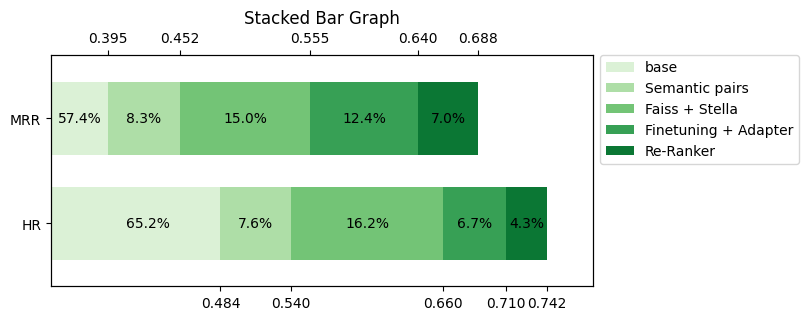

In [20]:
fig, ax1 = plt.subplots(figsize=(7, 0.5))
plt.tight_layout()

sns.set_palette("Greens", n_colors=5)
df.plot(
    kind = 'barh', 
    stacked = True, 
    title = 'Stacked Bar Graph', 
    mark_right = True,
    ax = ax1,
    width=0.7,
    figsize=(7, 3)) 

for i, n in enumerate(prop): 
    for j, (v,p) in enumerate(n) : 
        # print(v)
        plt.text(p, i, str(v) + '%',  
                    va = 'center', ha = 'center')
ax1.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5), ncol=1)
ax2 = ax1.twiny()
ax1.set_xlim(left=0.35)
ax2.set_xlim(left=0.35)
ax2.set_xlim([x for x in ax1.get_xlim()])
ax2.set_xticks([0.395, 0.452,0.555,0.64,0.688])
ax1.set_xticks([0.484, 0.54, 0.66, 0.71, 0.742])
plt.savefig("bar_plot_final.png", dpi = 600,  bbox_inches="tight")
plt.show()

/tmp/ipykernel_77600/1274898042.py:2: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


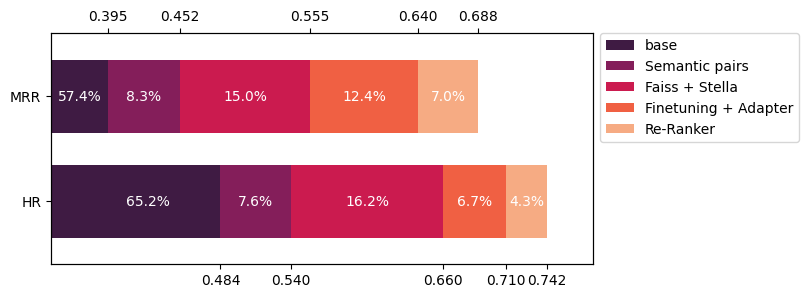

In [21]:
fig, ax1 = plt.subplots(figsize=(7, 0.5))
plt.tight_layout()

sns.set_palette("rocket", n_colors=5)
df.plot(
    kind = 'barh', 
    stacked = True, 
    # title = 'Stacked Bar Graph', 
    mark_right = True,
    ax = ax1,
    width=0.7,
    figsize=(7, 3)) 

for i, n in enumerate(prop): 
    for j, (v,p) in enumerate(n) : 
        # print(v)
        plt.text(p, i, str(v) + '%',  
                    va = 'center', ha = 'center', color="w")
ax1.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5), ncol=1)
ax2 = ax1.twiny()
ax1.set_xlim(left=0.35)
ax2.set_xlim(left=0.35)
ax2.set_xlim([x for x in ax1.get_xlim()])
ax2.set_xticks([0.395, 0.452,0.555,0.64,0.688])
ax1.set_xticks([0.484, 0.54, 0.66, 0.71, 0.742])
plt.savefig("bar_plot_final.png", dpi = 600,  bbox_inches="tight")
plt.show()